In [3]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

/var/folders/2l/zb5_xmsx54x0g2sb6y63xcsw0000gn/T/ipykernel_74365/3546024755.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
df = pd.read_csv('/Users/sachacollinson/dsmp-2024-group-30/FM_trans_data.csv')
df.head()

/var/folders/2l/zb5_xmsx54x0g2sb6y63xcsw0000gn/T/ipykernel_74365/60098323.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/sachacollinson/dsmp-2024-group-30/FM_trans_data.csv')


,AccountNumber,MoneyTransferAmount,TransferredLocationAccount,TransactionDate,CategoryTransferredLocationAccount,Frequency,MonetaryValue,F_Score,M_Score,RFM_Score,Cluster,Log_Frequency,Log_Monetary
0,10371.0,4.00,CINEMA,2025-01-01,FILM,1653,23974.11,1,3,13,2,7.410952,10.084771
1,98994.0,2.65,COFFEE_SHOP,2025-01-01,COFFEE,960,13433.62,4,1,41,0,6.867974,9.505590
2,98994.0,2.20,A_LOCAL_COFFEE_SHOP,2025-01-01,COFFEE,960,13433.62,4,1,41,0,6.867974,9.505590
3,34189.0,14.50,BAR,2025-01-01,BAR,874,14973.00,4,1,41,0,6.774224,9.614071
4,86417.0,4.35,COFFEE_SHOP,2025-01-01,COFFEE,1692,16260.95,1,1,11,2,7.434257,9.696583


In [11]:
print(df.columns)

Index(['AccountNumber', 'MoneyTransferAmount', 'TransferredLocationAccount',
       'TransactionDate', 'CategoryTransferredLocationAccount', 'Frequency',
       'MonetaryValue', 'F_Score', 'M_Score', 'RFM_Score', 'Cluster',
       'Log_Frequency', 'Log_Monetary'],
      dtype='object')


In [16]:
# Convert TransactionDate to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract year, month, and week
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Week'] = df['TransactionDate'].dt.isocalendar().week

# Check the new columns
df.head()

,AccountNumber,MoneyTransferAmount,TransferredLocationAccount,TransactionDate,CategoryTransferredLocationAccount,Frequency,MonetaryValue,F_Score,M_Score,RFM_Score,Cluster,Log_Frequency,Log_Monetary,Year,Month,Week
0,10371.0,4.00,CINEMA,2025-01-01,FILM,1653,23974.11,1,3,13,2,7.410952,10.084771,2025,1,1
1,98994.0,2.65,COFFEE_SHOP,2025-01-01,COFFEE,960,13433.62,4,1,41,0,6.867974,9.505590,2025,1,1
2,98994.0,2.20,A_LOCAL_COFFEE_SHOP,2025-01-01,COFFEE,960,13433.62,4,1,41,0,6.867974,9.505590,2025,1,1
3,34189.0,14.50,BAR,2025-01-01,BAR,874,14973.00,4,1,41,0,6.774224,9.614071,2025,1,1
4,86417.0,4.35,COFFEE_SHOP,2025-01-01,COFFEE,1692,16260.95,1,1,11,2,7.434257,9.696583,2025,1,1


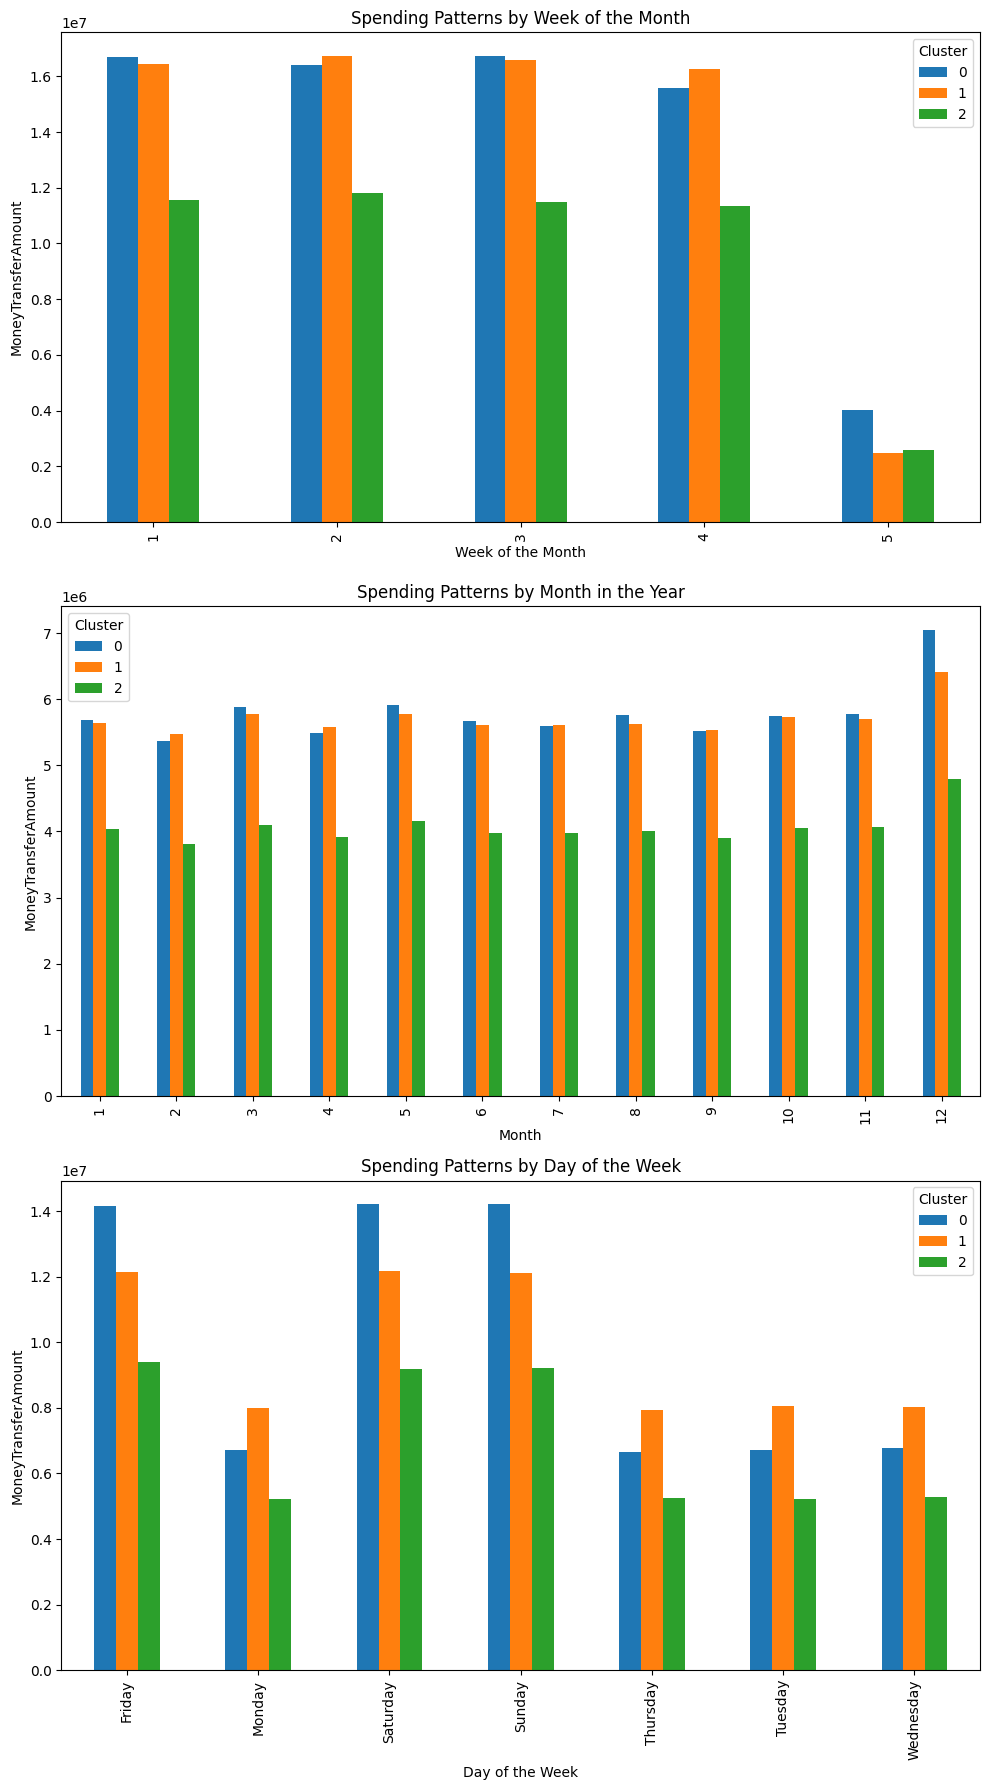

In [21]:
# Calculate the week of the month for each transaction
df['Day'] = df['TransactionDate'].dt.day
df['WeekOfMonth'] = df['Day'].apply(lambda x: (x - 1) // 7 + 1)

# Aggregate spending patterns for each cluster by week of the month, month in the year, and day of the week
agg_week_of_month = df.groupby(['Cluster', 'WeekOfMonth'])['MoneyTransferAmount'].sum().unstack('Cluster')
agg_month_in_year = df.groupby(['Cluster', 'Month'])['MoneyTransferAmount'].sum().unstack('Cluster')
agg_day_of_week = df.groupby(['Cluster', df['TransactionDate'].dt.day_name()])['MoneyTransferAmount'].sum().unstack('Cluster')

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Week in the Month
agg_week_of_month.plot(kind='bar', ax=axs[0])
axs[0].set_title('Spending Patterns by Week of the Month')
axs[0].set_xlabel('Week of the Month')
axs[0].set_ylabel('MoneyTransferAmount')
axs[0].legend(title='Cluster')

# Month in the Year
agg_month_in_year.plot(kind='bar', ax=axs[1])
axs[1].set_title('Spending Patterns by Month in the Year')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('MoneyTransferAmount')
axs[1].legend(title='Cluster')

# Day of the Week
agg_day_of_week.plot(kind='bar', ax=axs[2])
axs[2].set_title('Spending Patterns by Day of the Week')
axs[2].set_xlabel('Day of the Week')
axs[2].set_ylabel('MoneyTransferAmount')
axs[2].legend(title='Cluster')

plt.tight_layout()
plt.show()

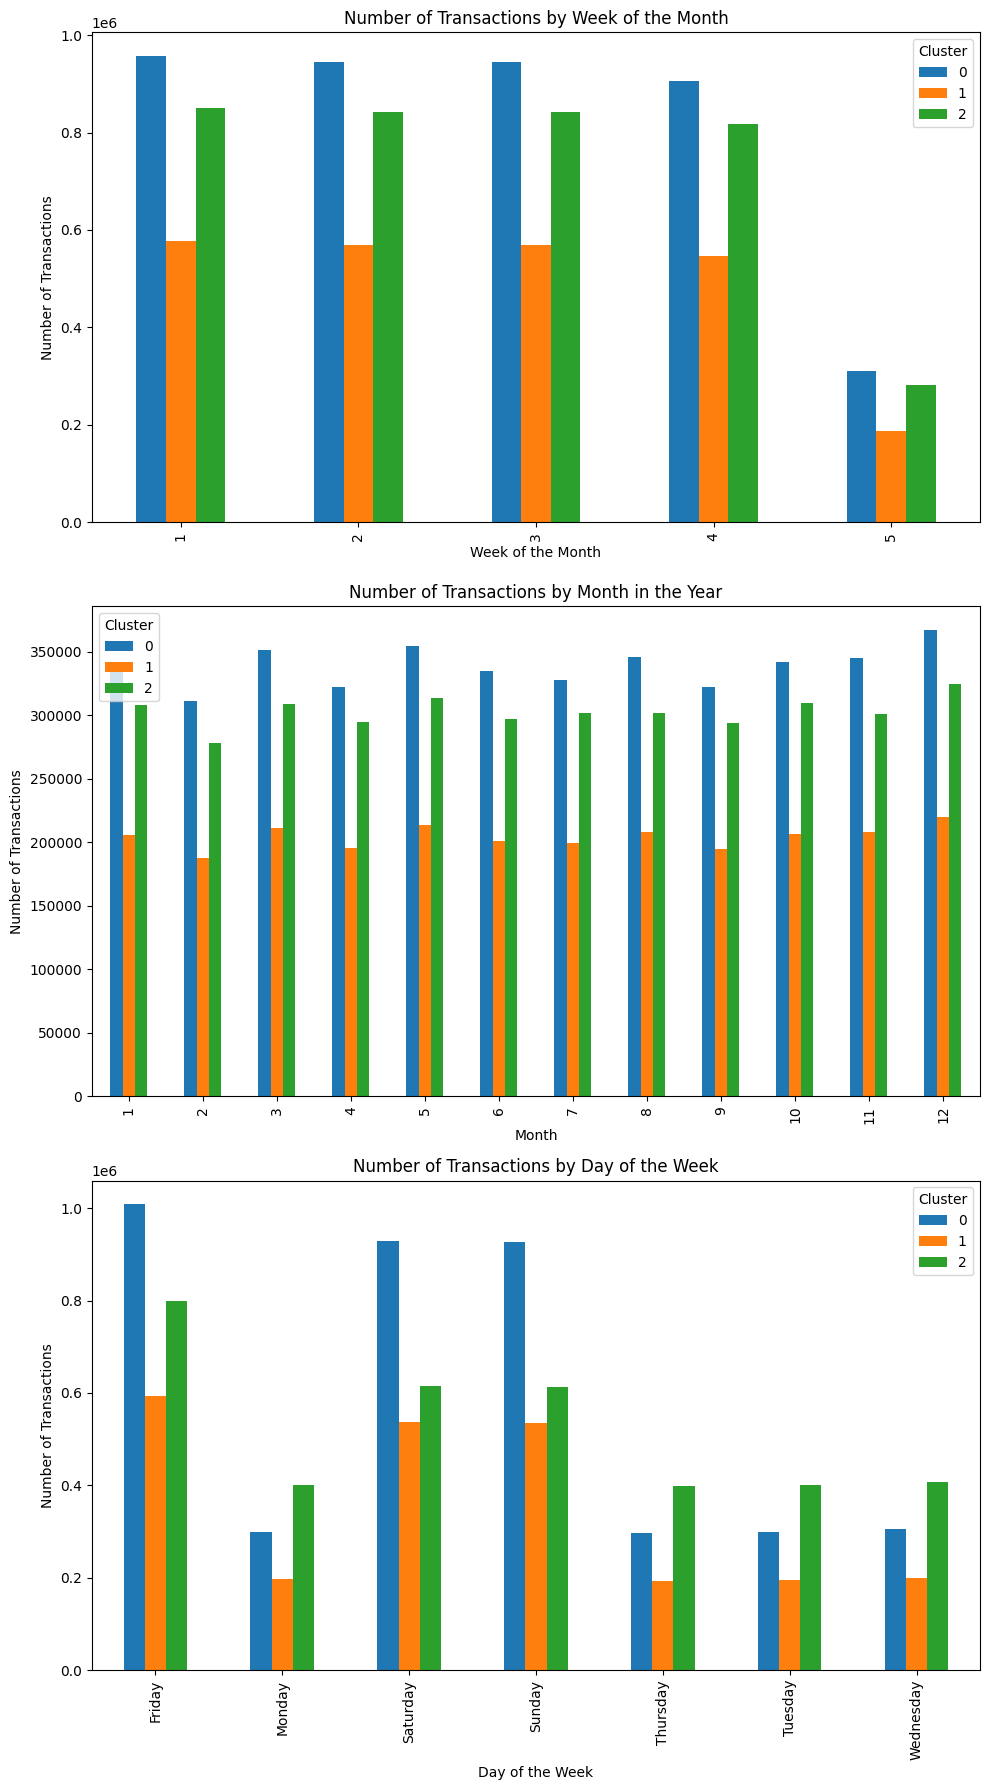

In [22]:
# Aggregate the number of transactions for each cluster by week of the month, month in the year, and day of the week
trans_week_of_month = df.groupby(['Cluster', 'WeekOfMonth'])['MoneyTransferAmount'].count().unstack('Cluster')
trans_month_in_year = df.groupby(['Cluster', 'Month'])['MoneyTransferAmount'].count().unstack('Cluster')
trans_day_of_week = df.groupby(['Cluster', df['TransactionDate'].dt.day_name()])['MoneyTransferAmount'].count().unstack('Cluster')

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Number of Transactions by Week of the Month
trans_week_of_month.plot(kind='bar', ax=axs[0])
axs[0].set_title('Number of Transactions by Week of the Month')
axs[0].set_xlabel('Week of the Month')
axs[0].set_ylabel('Number of Transactions')
axs[0].legend(title='Cluster')

# Number of Transactions by Month in the Year
trans_month_in_year.plot(kind='bar', ax=axs[1])
axs[1].set_title('Number of Transactions by Month in the Year')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Transactions')
axs[1].legend(title='Cluster')

# Number of Transactions by Day of the Week
trans_day_of_week.plot(kind='bar', ax=axs[2])
axs[2].set_title('Number of Transactions by Day of the Week')
axs[2].set_xlabel('Day of the Week')
axs[2].set_ylabel('Number of Transactions')
axs[2].legend(title='Cluster')

plt.tight_layout()
plt.show()